# Calculate shear as a function of time on an adcp

python: >=3.7

author: S.Bell

In [2]:
import numpy as np
import pandas as pd

import xarray as xr

In [158]:
"""------------------------------------- Shear Calc -----------------------------------"""

def calc_shear(uvect, vvect, depth):
    
    #find and replace missing data with nan for now
    uvect[np.where(uvect >1e34)] = np.nan
    vvect[np.where(vvect >1e34)] = np.nan
    
    # Vector difference
    # SQRT( (U2-U1)**2 + (V2-V1)**2 ) / depth of layer
    shear = np.sqrt( (np.diff(uvect))**2 + (np.diff(vvect))**2) / np.abs(np.diff(depth*100))
    
    #replace values larger than 1e35 with 1e35
    shear[np.where(shear > 1e35 )] = 1e35
    #replace missing values with 1e35
    shear[np.where(np.isnan(shear))] = 1e35
    
    shear_depthm = ( depth[:-1]+np.diff(depth)/2 )  # return in meters
    
    return shear, shear_depthm

In [192]:
f1 = '/Users/bell/ecoraid/2016/Moorings/16ckp5a/final_data/16ckp5a_wcp_vel.cf.nc'
f2 = '/Users/bell/ecoraid/2013/Moorings/13ckp5a/final_data/13CKP5A_wcp_vel.cf.nc'

In [193]:
x1 = xr.open_dataset(f1)
x2 = xr.open_dataset(f2)

In [194]:
shear = shear_depth = []
for i in range(0,x1.time.shape[0],1):
    shear_t,shear_depth_t = calc_shear(uvect=x1.isel(time=i).u_1205.data[:,0,0],
                                   vvect=x1.isel(time=i).v_1206.data[:,0,0],
                                   depth=x1.isel(time=i).depth.data)
    if i==0:
        shear = shear_t
        shear_depth = shear_depth_t 
    else:
        shear = np.vstack((shear,[shear_t]))
        shear_depth = np.vstack((shear_depth,[shear_depth_t]))   
        
shear[shear>1e34] = np.nan

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


In [195]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

(35.0, 0)

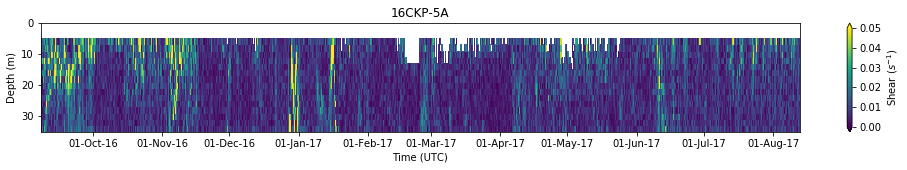

In [199]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = plt.pcolormesh(x1.time.data,shear_depth[0],shear.T,vmin=0,vmax=.05)
ax.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b-%y')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel(r'Shear ($s^{-1})$')
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Time (UTC)')
ax.set_title('16CKP-5A')
ax.set_ylim([shear_depth[0].max(),0])
#ax.set_xlim(['2017-07-01','2017-08-01'])

In [ ]:
### 2013 - for July of 14

In [200]:
shear = shear_depth = []
for i in range(0,x2.time.shape[0],1):
    shear_t,shear_depth_t = calc_shear(uvect=x2.isel(time=i).u_1205.data[:,0,0],
                                   vvect=x2.isel(time=i).v_1206.data[:,0,0],
                                   depth=x2.isel(time=i).depth.data)
    if i==0:
        shear = shear_t
        shear_depth = shear_depth_t 
    else:
        shear = np.vstack((shear,[shear_t]))
        shear_depth = np.vstack((shear_depth,[shear_depth_t]))   
        
shear[shear>1e34] = np.nan

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


(735415.0, 735446.0)

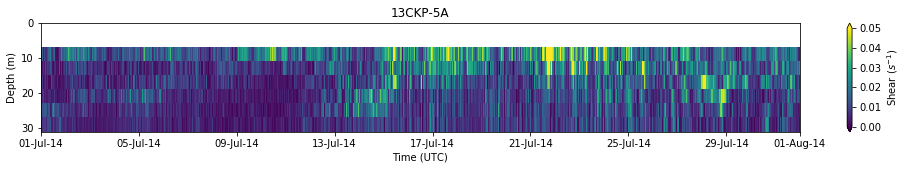

In [202]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = plt.pcolormesh(x2.time.data,shear_depth[0],shear.T,vmin=0,vmax=.05)
ax.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b-%y')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel(r'Shear ($s^{-1})$')
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Time (UTC)')
ax.set_title('13CKP-5A')
ax.set_ylim([shear_depth[0].max(),0])
ax.set_xlim(['2014-07-01','2014-08-01'])